In [22]:
import os
import pandas as pd
import math
import sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import pickle as pkl
plt.style.use(os.path.join(mpl.get_configdir(), 'latexstyle.mplstyle'))
sys.path.append('/home/ak/Documents/Research/PaperCode/singlekernelclf')
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from collections import defaultdict
import multiprocessing
import math
import seaborn as sns

## pull in all the various utils I need

In [2]:
from fileutils import DataLoader as DataLoader
from fileutils import paths
from fileutils import new_feature_utils as nfu

## where figures will get stored

In [3]:
figuresDestination ='/home/ak/Documents/Research/Papers/HybridLearningPaper/figures/'
symbols = os.listdir(paths('symbols_features'))

alternate_labels_nos = [1, 2, 3, 4, 5, 6, 7]  # we have 7 alternative data types

mainPath = paths('main')

labelsAnalysisResults = '/media/ak/DataOnly/ExperimentCommonLocs/LabelAnalysisResults/'

In [4]:
df_across_dates= pd.DataFrame() # this is where i will store all the labels distribution for each symbol

In [11]:

def open_pickle_filepath(pickle_file):
    pickle_to_file = pickle.load(open(pickle_file, "rb"), encoding='latin1')

    return pickle_to_file



def relative_movements(df, label_idx):
    global proportionMoveNoMove
    
    if math.isnan(df[label_idx][-1]) == True:
        
        proportionMoveNoMove = df[label_idx][1]/df[label_idx][0] # move to no move
    
    elif math.isnan(df[label_idx][0]) == True:
        
        proportionMoveNoMove = df[label_idx][1]/df[label_idx][-1] # move up versus move down
    
    elif math.isnan(df[label_idx][-1]) == True and math.isnan(df[label_idx][1]) == True:
        pass
    
    elif math.isnan(df[label_idx][-1]) == True and math.isnan(df[label_idx][0]) == True:
        pass
    
    elif math.isnan(df[label_idx][0]) == True and math.isnan(df[label_idx][1]) == True:
        pass
    
    elif math.isnan(df[label_idx][-1]) == True and math.isnan(df[label_idx][1]) == True and math.isnan(df[label_idx][0]) == True:
        pass
    
    elif math.isnan(df[label_idx][-1]) != True and math.isnan(df[label_idx][1]) != True and math.isnan(df[label_idx][0]) != True:
        
        proportionMoveNoMove = (df[label_idx][1] + df[label_idx][-1]) /df[label_idx][0] # move to no move
                
    return proportionMoveNoMove
    

#### various inputs- will need to iterate over

In [12]:
def symbol_feature_paths(mainPath, symbol):
    """
    mainPath: is the main path created in Dataloader
    symbol
    returns: symbol paths dictionary indexed by keys which are dates
    keys: which are the dates for the symbol's features paths
    """
    
    symbolData = DataLoader(mainPath, symbol)
    hmm_dates_list = sorted(symbolData.hmm_dates_list) ## all hmm model dates
    hmm_date_indx = 0 # pick a model date index
    hmm_date = hmm_dates_list[hmm_date_indx]  # pull out the date
    hmm_features_date_path = os.path.join(symbolData.symbol_features_path, hmm_date)
    symbol_feature_paths = {feature_file.split("_")[5]: os.path.join(hmm_features_date_path, feature_file) for
                            f, feature_file in enumerate(sorted(os.listdir(hmm_features_date_path)))}

   
    return symbol_feature_paths
# for key in keys:  # <--- this is the label key in older versions of the code!


# all sorts of analysis needed for the label distribution
# for every key, which represents a data, label_date_dict[key], we get a dictionary that has 7 keys (1-7) which represent the keys for the labels. For some random date/"key", you get:
# label_date_dict[key] = {{1: 0 0.0 1 0.0 2 0.0 3 0.0 4 0.0 ... }

# label_date_dict[key].keys() = dict_keys([1, 2, 3, 4, 5, 6, 7])

# value_counts, returns basically the number of 0, 1, -1 in the dataframe and label_names- plain names
def labels_dicionaries(keys, alternate_labels_nos):
    label_date_dict = defaultdict(dict)
    label_names = dict()
    value_counts_dict =dict()
    
    for label_idx in alternate_labels_nos:    
        for key_idx, key in enumerate(keys): # this is a date
            labels_file_path = os.path.join(symbolData.symbol_specific_label_path(label_idx), key + ".csv")
            labels = pd.read_csv(labels_file_path) # load all the labels
            label_name = str(labels.columns[labels.columns.str.contains(pat='label')].values[0]) #strip the name
            labels_values = labels[label_name] # keep the values of the labels only
            label_date_dict[key][label_idx] = (labels_values) # tag label values into a dictionary
            label_names[label_idx] = label_name # keep the label names
            value_counts_dict[key] =pd.DataFrame.from_dict(label_date_dict[key]).apply(pd.Series.value_counts) # do a simple count of numbers of each label values
    return label_date_dict, value_counts_dict, label_names
            
def relative_movement_calculation():

    label_date_dict, value_counts_dict, label_names =labels_dicionaries(keys, alternate_labels_nos)
    relative_movement_dict  = defaultdict(dict)
    for key in keys:
        for label_no in alternate_labels_nos:
            print('##############Date:',key, '################ & Label: ', label_no)
            relative_movement_dict[key][label_no]  = (relative_movements(value_counts_dict[key], label_no))
           # print(relative_movement_dict)
        return relative_movement_dict

In [13]:

## pick a symbol
symbolsIdx = 1
print(symbols[symbolsIdx])
symbol = symbols[symbolsIdx]
for symbol in symbols:
    symbolData = DataLoader(mainPath, symbol)
    paths = symbol_feature_paths(mainPath, symbol)
    keys = sorted(list(paths.keys()))
    # print(keys)


    ## main piece of code is here ## 

    relative_movement_dict = relative_movement_calculation()
    relative_movement_dict.keys()
    dfDatesLabels = pd.DataFrame.from_dict(relative_movement_dict, orient= "index")

    df_across_dates[str(symbol)] = dfDatesLabels.median(axis=0)

SMIN.L
##############Date: 20170117 ################ & Label:  1
##############Date: 20170117 ################ & Label:  2
##############Date: 20170117 ################ & Label:  3
##############Date: 20170117 ################ & Label:  4
##############Date: 20170117 ################ & Label:  5
##############Date: 20170117 ################ & Label:  6
##############Date: 20170117 ################ & Label:  7
##############Date: 20170704 ################ & Label:  1
##############Date: 20170704 ################ & Label:  2
##############Date: 20170704 ################ & Label:  3
##############Date: 20170704 ################ & Label:  4
##############Date: 20170704 ################ & Label:  5
##############Date: 20170704 ################ & Label:  6
##############Date: 20170704 ################ & Label:  7
##############Date: 20170117 ################ & Label:  1
##############Date: 20170117 ################ & Label:  2
##############Date: 20170117 ################ & Label:  3
#######

##############Date: 20170704 ################ & Label:  1
##############Date: 20170704 ################ & Label:  2
##############Date: 20170704 ################ & Label:  3
##############Date: 20170704 ################ & Label:  4
##############Date: 20170704 ################ & Label:  5
##############Date: 20170704 ################ & Label:  6
##############Date: 20170704 ################ & Label:  7
##############Date: 20170117 ################ & Label:  1
##############Date: 20170117 ################ & Label:  2
##############Date: 20170117 ################ & Label:  3
##############Date: 20170117 ################ & Label:  4
##############Date: 20170117 ################ & Label:  5
##############Date: 20170117 ################ & Label:  6
##############Date: 20170117 ################ & Label:  7
##############Date: 20170202 ################ & Label:  1
##############Date: 20170202 ################ & Label:  2
##############Date: 20170202 ################ & Label:  3
##############

IndexError: list index out of range

In [15]:
df_across_dates.to_csv(os.path.join(labelsAnalysisResults,"LabelsProportionsAcrossDates.csv"))

In [141]:
df_across_dates

,LGEN.L,SMIN.L,NG.L,BLT.L,KGF.L,CNA.L,PRU.L,SHP.L,RTO.L,BATS.L,...,HSBA.L,RDSb.L,LLOY.L,MKS.L,WPP.L,DGE.L,CPG.L,BARC.L,AV.L,AAL.L
1,0.044,0.031,0.0095,0.041,0.063,0.026,0.018,0.0076,0.062,0.0039,...,0.0027,0.018,0.015,0.095,0.021,0.0063,0.076,0.028,0.039,0.088
2,4.9,2.0,1.7,3.0,3.8,2.7,3.5,1.9,4.7,0.88,...,0.87,2.0,2.3,4.5,1.8,1.7,2.4,3.1,3.6,3.9
3,1.7,0.95,0.49,0.92,1.6,1.2,1.1,0.49,1.5,0.23,...,0.16,0.62,0.68,1.9,0.82,0.37,1.3,1.1,1.2,1.6
4,0.0015,nan,0.002,0.002,0.0028,0.00076,0.00069,0.0029,0.0012,0.00035,...,0.0012,0.00099,0.0014,0.0052,0.00051,0.0013,0.0058,0.00048,0.0017,0.0014
5,0.47,0.13,0.052,0.12,0.37,0.31,0.2,0.043,0.18,0.024,...,0.0069,0.1,0.072,0.48,0.084,0.031,0.23,0.2,0.27,0.21
6,nan,nan,nan,0.12,0.37,nan,nan,nan,nan,0.024,...,nan,nan,0.00035,nan,nan,nan,0.0005,nan,nan,0.21
7,0.0064,nan,0.0023,0.0063,0.016,0.0076,0.0032,0.0039,0.0097,0.0016,...,0.00083,0.0036,0.0037,0.022,nan,0.0008,0.022,0.002,0.0063,0.012


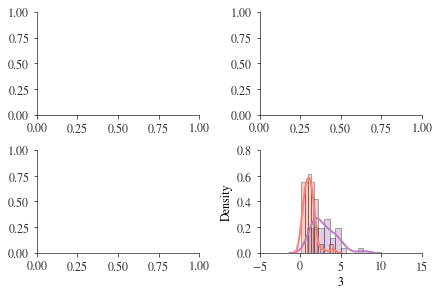

In [129]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, constrained_layout = True)
ax1 =sns.distplot(df_across_dates.iloc[1], bins =10)
ax2 =sns.distplot(df_across_dates.iloc[2], bins =10)

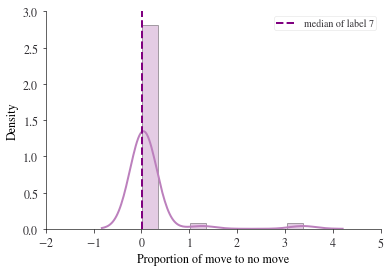

In [154]:
_=sns.distplot(df_across_dates.iloc[0], bins =10)
plt.axvline(df_across_dates.iloc[6].median(), linestyle = '--', color = 'purple', label ='median of label 7')
_=plt.xlabel("Proportion of move to no move")
plt.legend()
# figName = os.path.join(figuresDestination, 'Labe71Distribution.png')
# plt.savefig(figName , dpi =150 )

In [158]:
df_across_dates.head(4)

,LGEN.L,SMIN.L,NG.L,BLT.L,KGF.L,CNA.L,PRU.L,SHP.L,RTO.L,BATS.L,...,HSBA.L,RDSb.L,LLOY.L,MKS.L,WPP.L,DGE.L,CPG.L,BARC.L,AV.L,AAL.L
1,0.044,0.031,0.0095,0.041,0.063,0.026,0.018,0.0076,0.062,0.0039,...,0.0027,0.018,0.015,0.095,0.021,0.0063,0.076,0.028,0.039,0.088
2,4.9,2.0,1.7,3.0,3.8,2.7,3.5,1.9,4.7,0.88,...,0.87,2.0,2.3,4.5,1.8,1.7,2.4,3.1,3.6,3.9
3,1.7,0.95,0.49,0.92,1.6,1.2,1.1,0.49,1.5,0.23,...,0.16,0.62,0.68,1.9,0.82,0.37,1.3,1.1,1.2,1.6
4,0.0015,nan,0.002,0.002,0.0028,0.00076,0.00069,0.0029,0.0012,0.00035,...,0.0012,0.00099,0.0014,0.0052,0.00051,0.0013,0.0058,0.00048,0.0017,0.0014


In [165]:
df_across_dates.median(axis=1)

1    0.033
2      2.5
3      1.1
4   0.0017
5     0.17
6    0.083
7   0.0064
dtype: float64

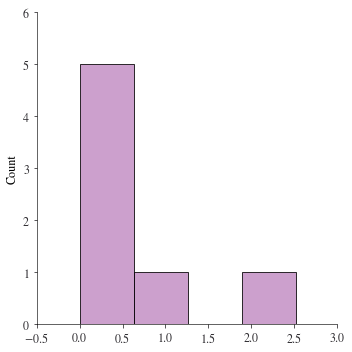

In [161]:
sns.displot(df_across_dates.median(axis=1))

In [162]:
_=sns.distplot(df_across_dates.iloc[7], bins =10)
plt.axvline(df_across_dates.iloc[7].median(), linestyle = '--', color = 'purple', label ='median of label 7')
_=plt.xlabel("Proportion of move to no move")
plt.legend()
# figName = os.path.join(figuresDestination, 'Label7Distribution.png')
# plt.savefig(figName , dpi =150 )

IndexError: single positional indexer is out-of-bounds

In [ ]:
ax[0, 0] = sns.distplot(df_across_dates.iloc[1], bins =10)

In [174]:
pd.options.display.float_format = '{:.2}'.format
#print(df_across_dates.to_latex(index=True))
df_across_dates = df_across_dates
df_across_dates.median(axis=1).T

1    0.033
2      2.5
3      1.1
4   0.0017
5     0.17
6    0.083
7   0.0064
dtype: float64

In [171]:
print(df_across_dates.median(axis=1).to_latex(index=True))  #[(6)]

\begin{tabular}{lr}
\toprule
{} &      0 \\
\midrule
1 &  0.033 \\
2 &    2.5 \\
3 &    1.1 \\
4 & 0.0017 \\
5 &   0.17 \\
6 &  0.083 \\
7 & 0.0064 \\
\bottomrule
\end{tabular}



In [166]:
plt.figure(figsize=(10,5))
df_across_dates.iloc[1].median(axis=1)


ValueError: No axis named 1 for object type <class 'pandas.core.series.Series'>

<Figure size 720x360 with 0 Axes>